In [1]:
import nanopyx.core.transform.interpolation_catmull_rom as catmull_rom
from nanopyx.core.analysis.registration import Registration

import numpy as np
from matplotlib import pyplot as plt

from skimage.draw import rectangle 

In [2]:
image = np.zeros((512, 512), dtype=np.float32)
rr, cc = rectangle((256-50, 256-50), extent=(40,40), shape=image.shape)
image[rr,cc] = 10

image_2 = catmull_rom.Interpolator(image).scale_xy(1.5,1.5)
image_2 = catmull_rom.Interpolator(image_2).rotate(2)

In [3]:
Reg = Registration(image, image_2)
image_fixed = Reg.register(translation=False, rotation=True, scaling=True)

Looking for scaling and rotation assuming NO translation...
2.019065560246945 1.4571581281271602


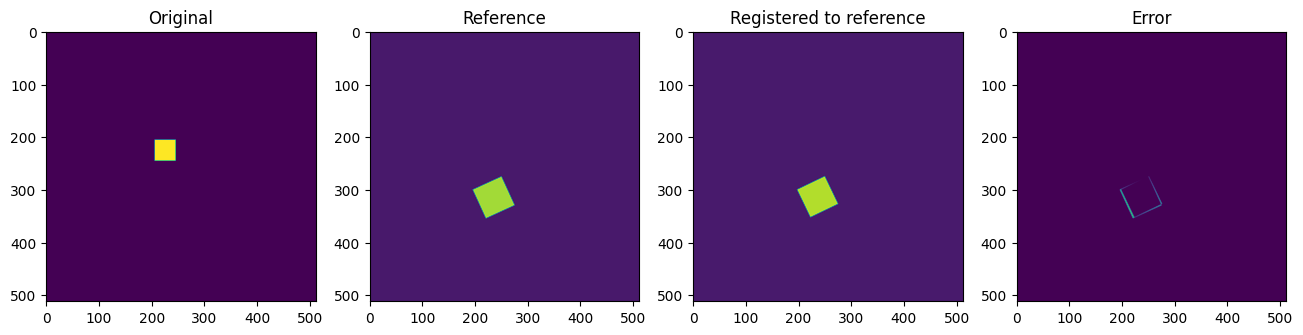

In [4]:
plt.close('all')
fig, axs = plt.subplots(1,4, figsize=(16,9))
axs[0].imshow(image)
axs[0].set_title("Original")

axs[1].imshow(image_2)
axs[1].set_title("Reference")

axs[2].imshow(image_fixed)
axs[2].set_title("Registered to reference")

axs[3].imshow((image_2-image_fixed)**2)
axs[3].set_title("Error")

plt.show()